In [1]:
import sys
sys.path.append('..')
from a2c_ppo_acktr.model import Policy, FlexBase
import umap
from read_experiments import load_exp_df, plot_exp_df

import gym
import gym_nav
%run representation_analysis
%run model_evaluation

## Record episodes of trained model

In [19]:
# model_name = 'meta_poster_width/meta_peast_width16'
model_name = 'meta_poster/meta_peast_auxwall12'
model, obs_rms, kwargs = load_model_and_env(model_name, 0)

eps = evalu(model, obs_rms, n=2, env_kwargs=kwargs, 
            with_activations=True, verbose=1, data_callback=nav_data_callback, capture_video=True)

C:\Users\14and\anaconda3\lib\site-packages\gym\wrappers\record_video.py:41: UserWarning: WARN: Overwriting existing videos at C:\Users\14and\Desktop\Work\github\training-rl-algo\write_and_test\video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


 Evaluation using 2 episodes: mean reward 1.50000



**Make sure resetting goal and character are making sense**

In [10]:
model_name = 'meta_poster_width/meta_peast_width16'
model, obs_rms, kwargs = load_model_and_env(model_name, 0)
env = gym.make('NavEnv-v0', **kwargs)

In [16]:
char_pos = []
goal_pos = []
for i in range(1000):
    env.reset()
    char_pos.append(env.character.pos)
    goal_pos.append(env.boxes[-1].center)
char_pos = np.vstack(char_pos)
goal_pos = np.vstack(goal_pos)

fig, ax = pplt.subplots(ncols=2)
ax[0].scatter(char_pos.T[0], char_pos.T[1])
ax[1].scatter(goal_pos.T[0], goal_pos.T[1])

**Make sure auxiliary tasks work**

In [33]:
env = gym.make('NavEnv-v0', **env_kwargs)

env.reset()


(array([0.66666667, 0.66666667, 0.16666667, 0.16666667, 0.16666667,
       0.47305057, 0.45608014, 0.45377476, 0.4608357 , 0.4805908 ]), 0, False, {'auxiliary': array([0.03055773, 0.46944227])})


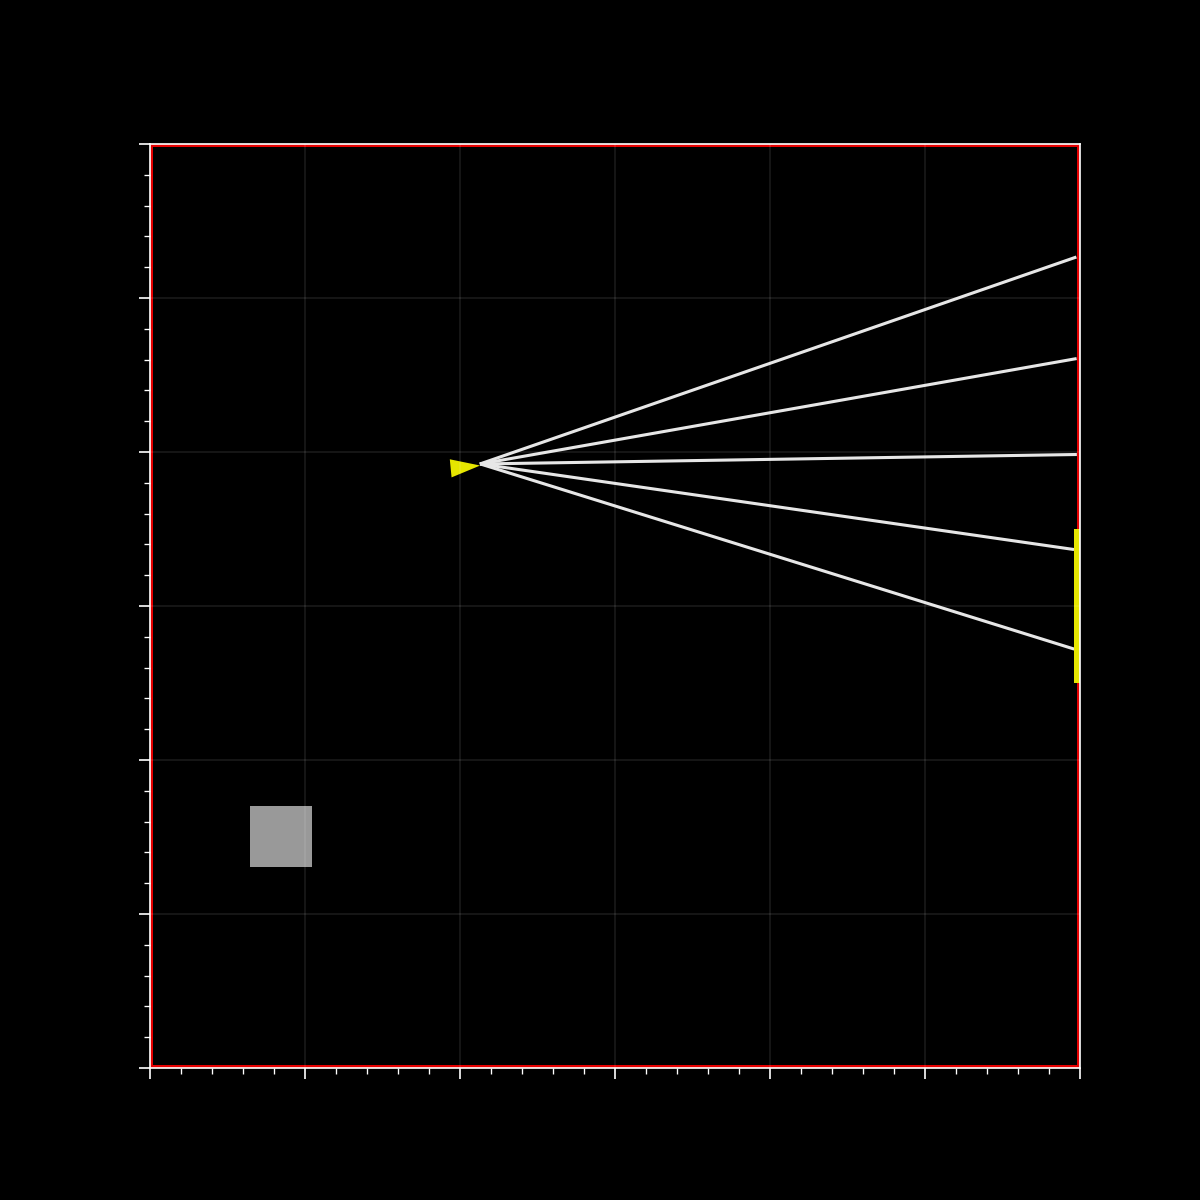

In [70]:
print(env.step(torch.tensor([2])))
env.render('human')

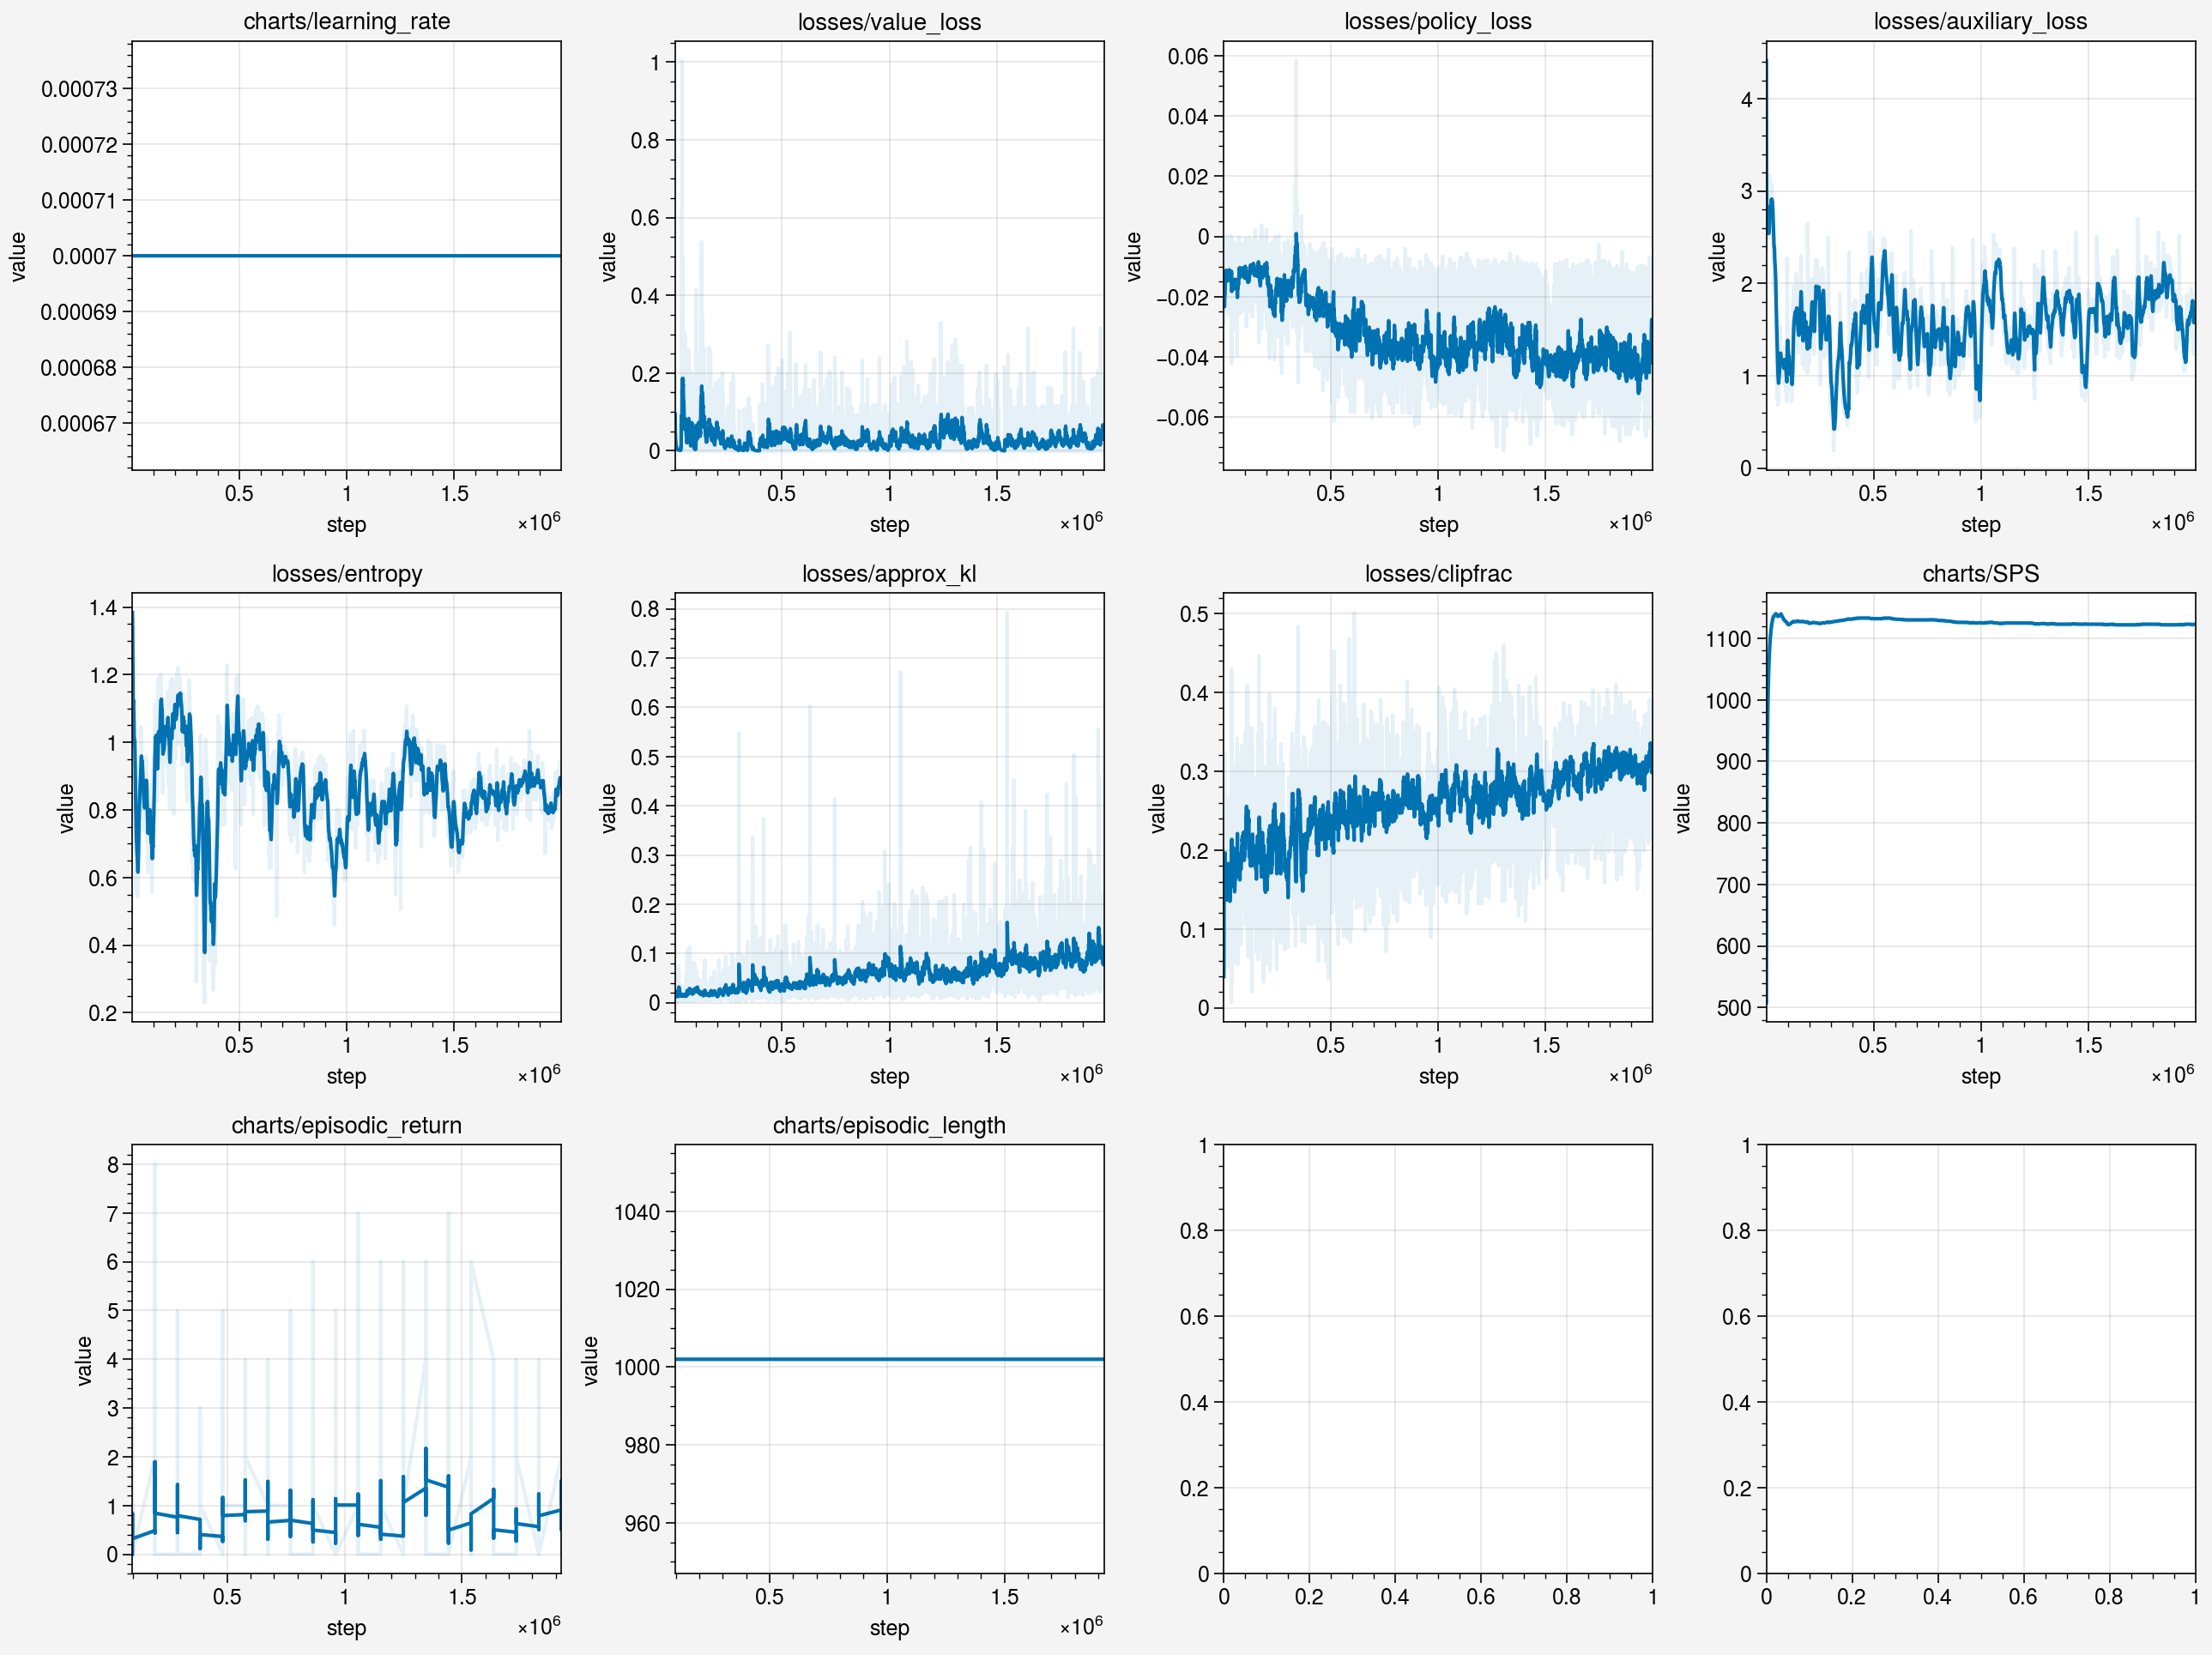

In [2]:
df = load_exp_df(exp_name='meta_poster/meta_peast_auxwall12')

plot_exp_df(df)

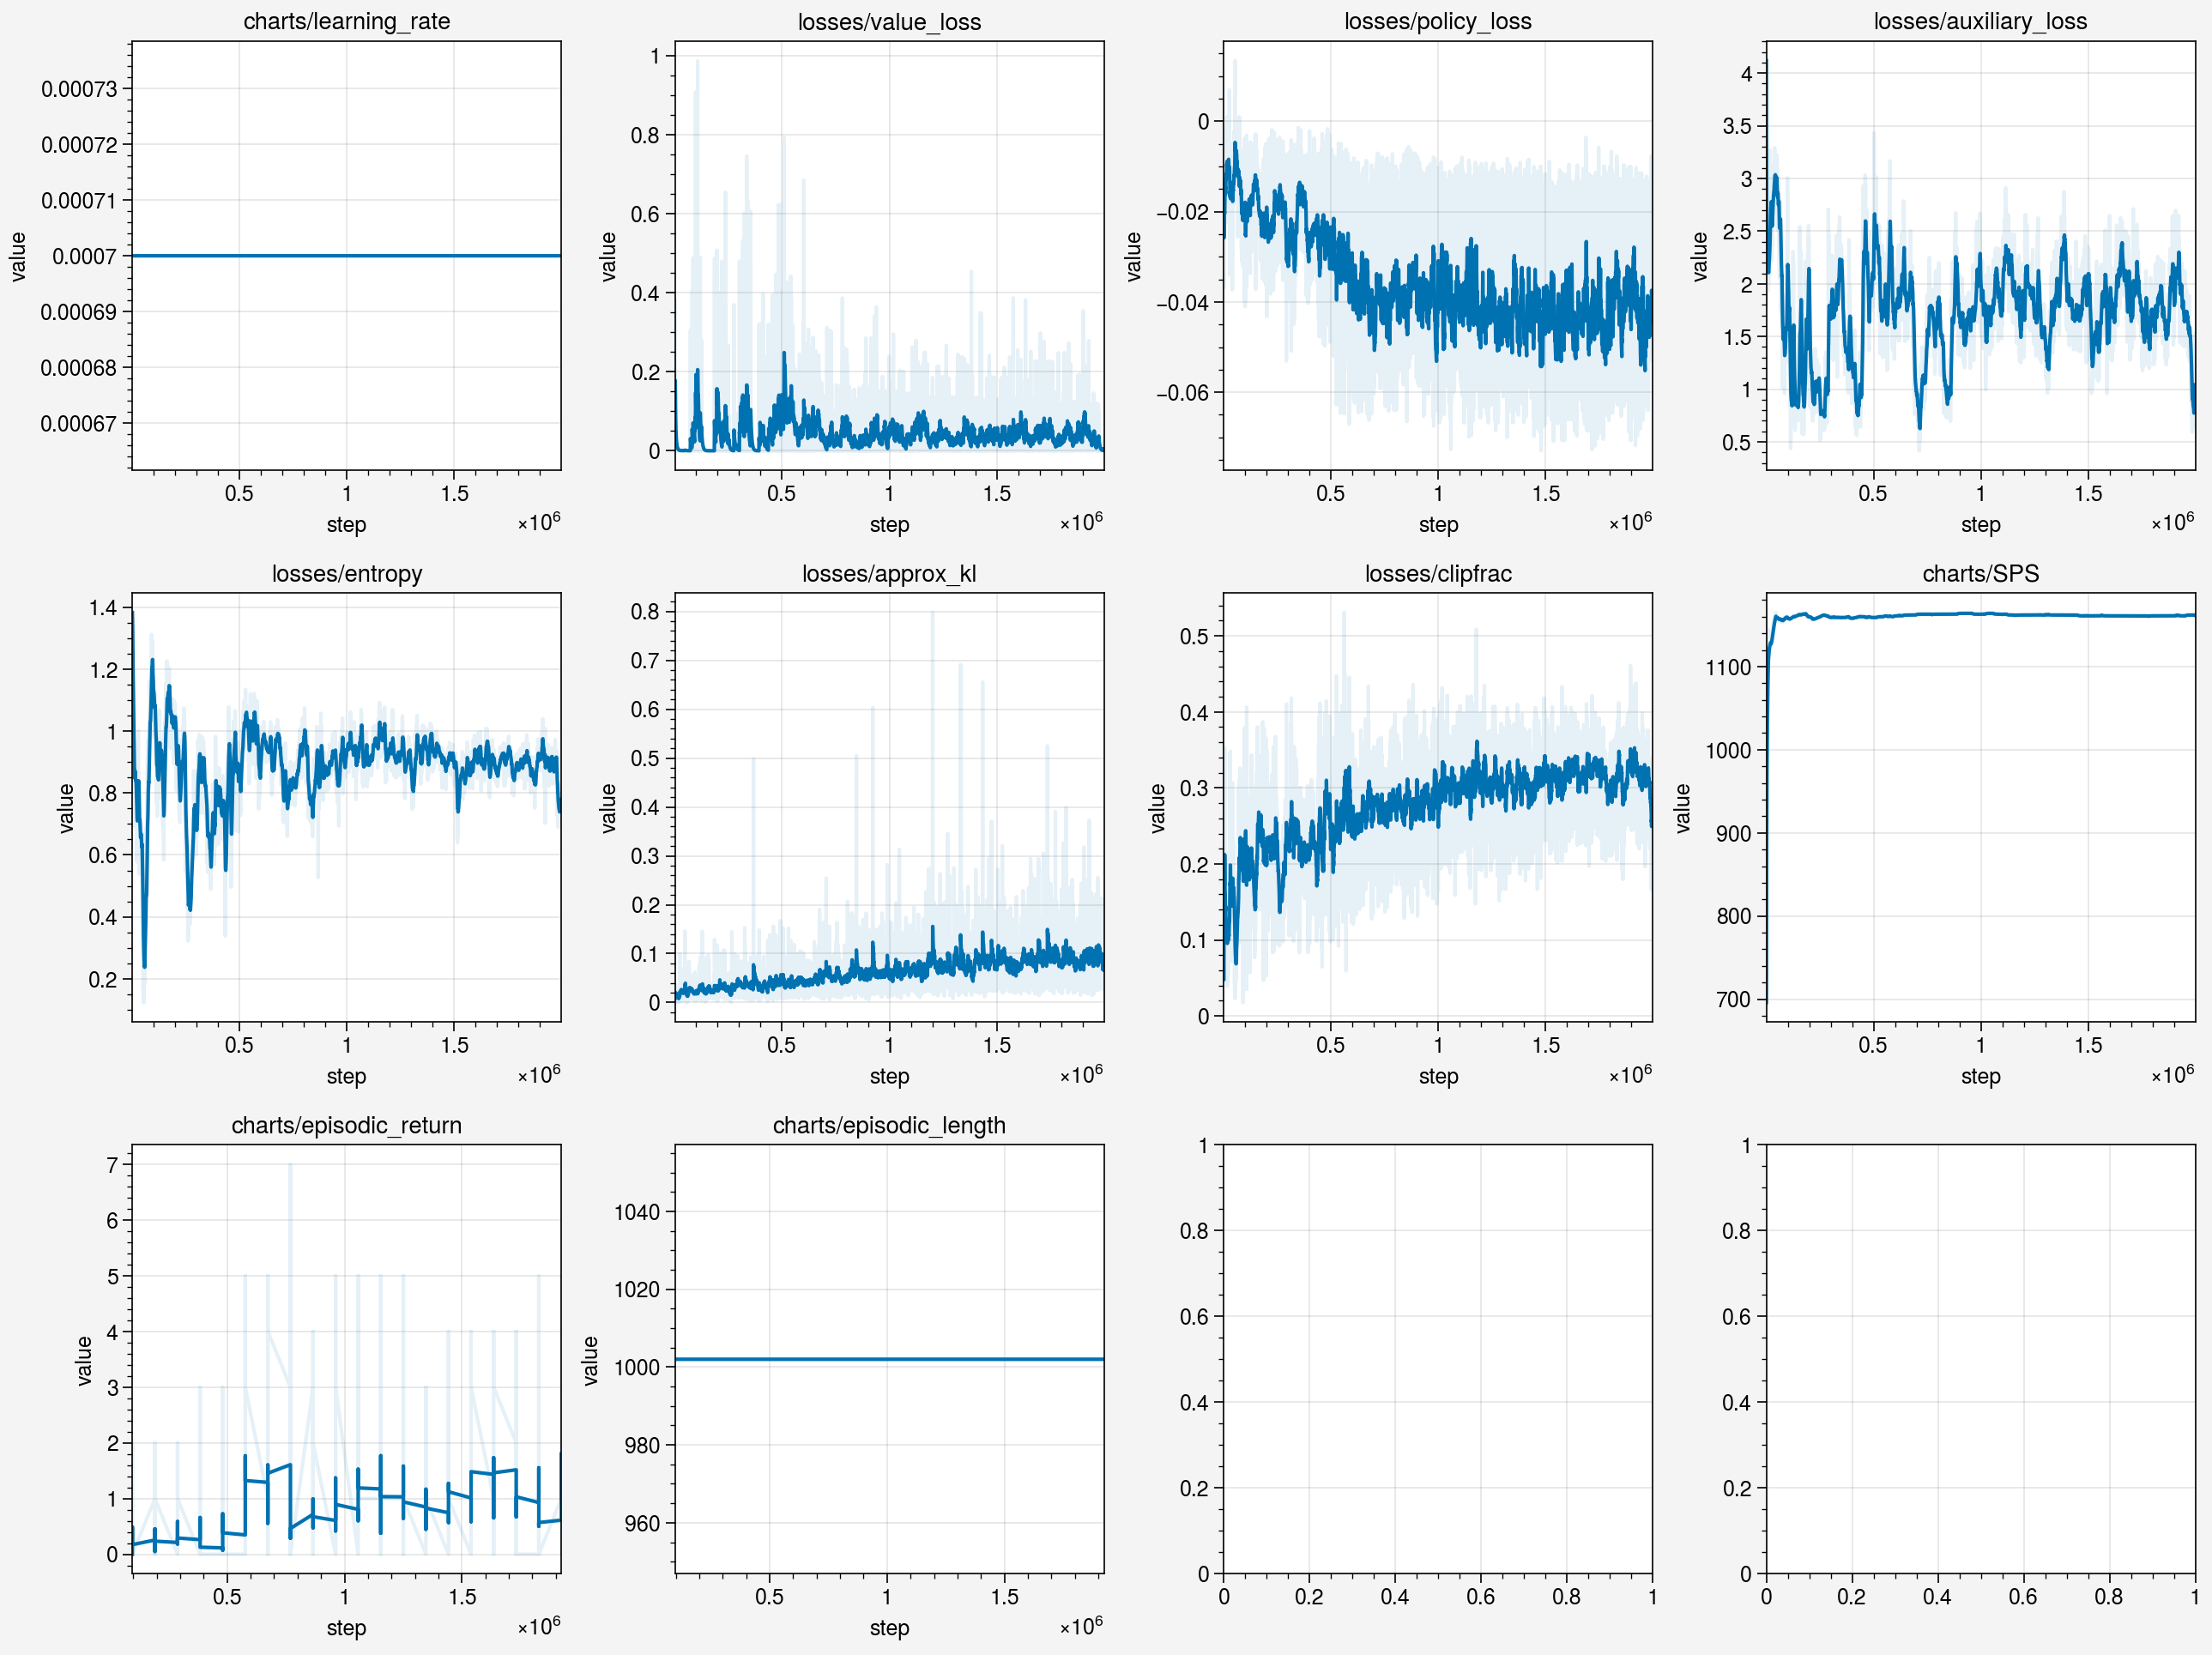

In [3]:
df = load_exp_df(exp_name='meta_poster/meta_peast_auxwall1')

plot_exp_df(df)

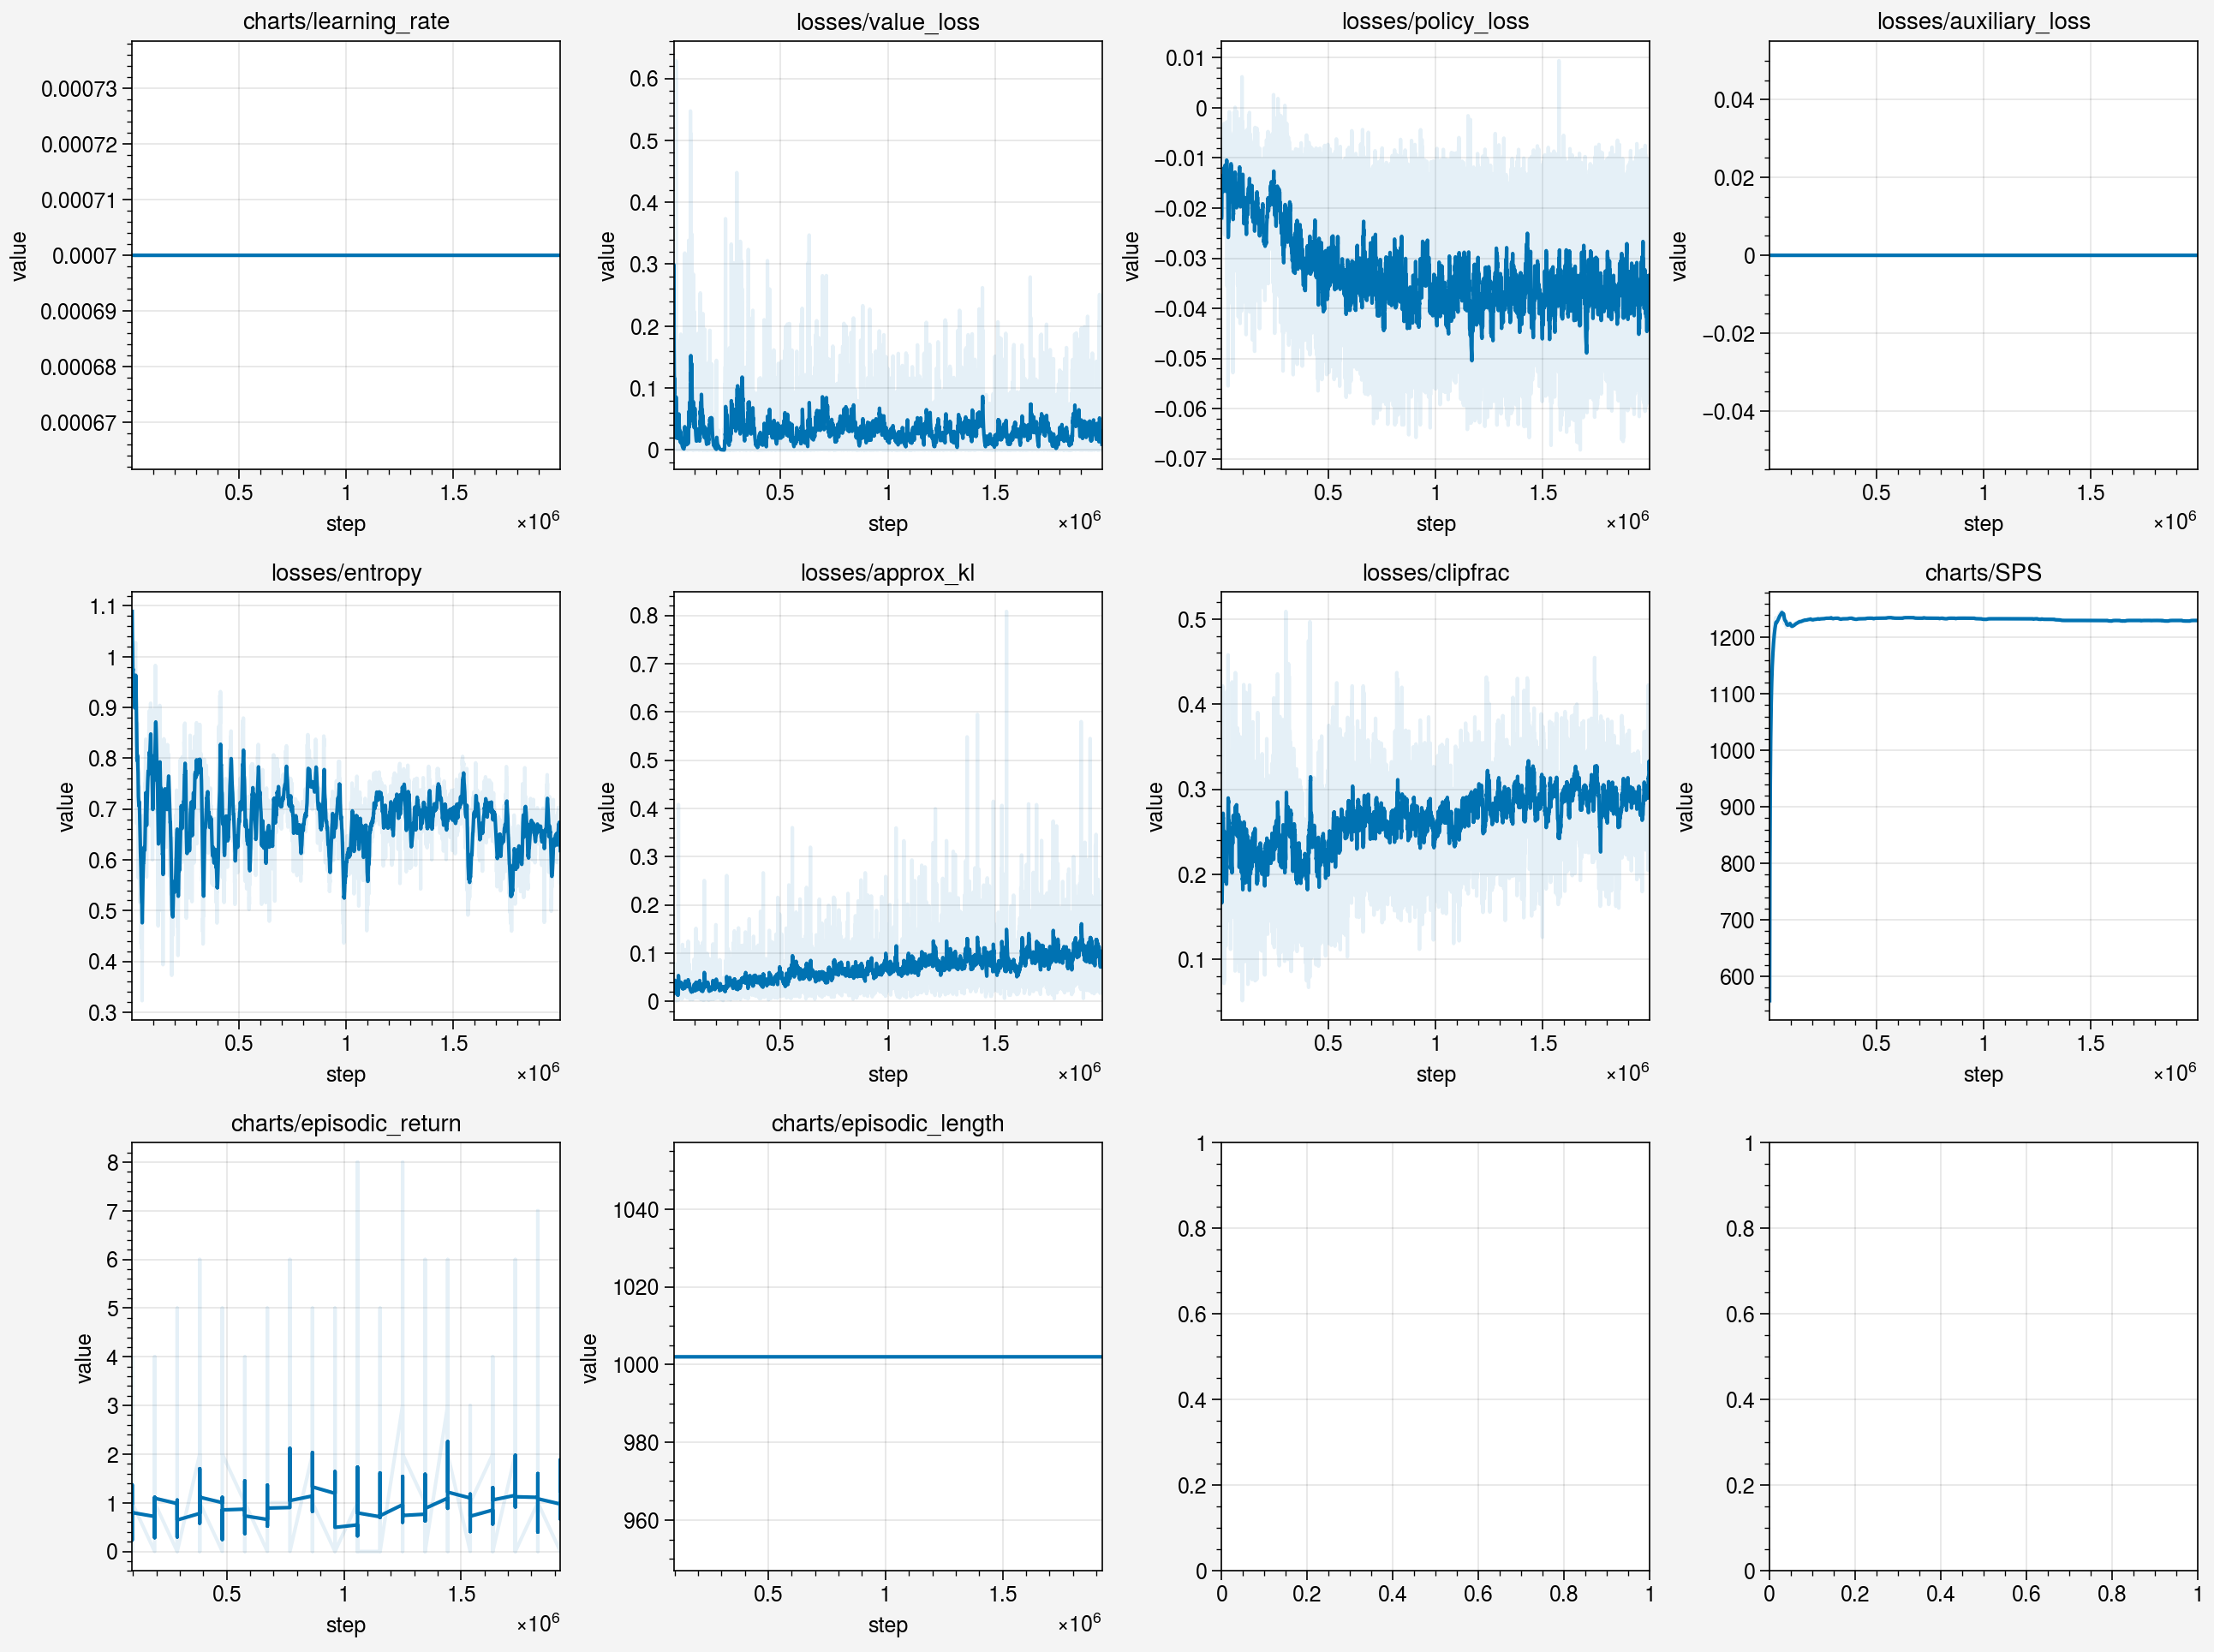

In [9]:
df = load_exp_df(exp_name='meta_poster/meta_c4')

plot_exp_df(df)

In [7]:
action_randomizer = lambda step: np.random.choice([0, 1, 2])
model_name = 'meta_poster_width/meta_peast_width16'
model, obs_rms, kwargs = load_model_and_env(model_name, 0)

eps = forced_action_evaluate(model, obs_rms, env_kwargs=kwargs, forced_actions=action_randomizer, verbose=1)

 Evaluation using 10 episodes: mean reward 1.00000



In [8]:
action_randomizer = lambda step: np.random.choice([0, 1, 2])
model_name = 'meta_poster_width/meta_peast_width16'
model, obs_rms, kwargs = load_model_and_env(model_name, 0)

eps = forced_action_evaluate(model, obs_rms, env_kwargs=kwargs, verbose=1)

 Evaluation using 10 episodes: mean reward 0.00000



In [7]:
action_randomizer = lambda step: np.random.choice([0, 1, 2])
model_name = 'meta_poster/meta_c4_batch200'
model, obs_rms, kwargs = load_model_and_env(model_name, 0)

eps = forced_action_evaluate(model, obs_rms, env_kwargs=kwargs, verbose=1, capture_video=True, num_episodes=5)

C:\Users\14and\anaconda3\lib\site-packages\gym\wrappers\record_video.py:41: UserWarning: WARN: Overwriting existing videos at C:\Users\14and\Desktop\Work\github\training-rl-algo\write_and_test\video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


 Evaluation using 5 episodes: mean reward 2.60000



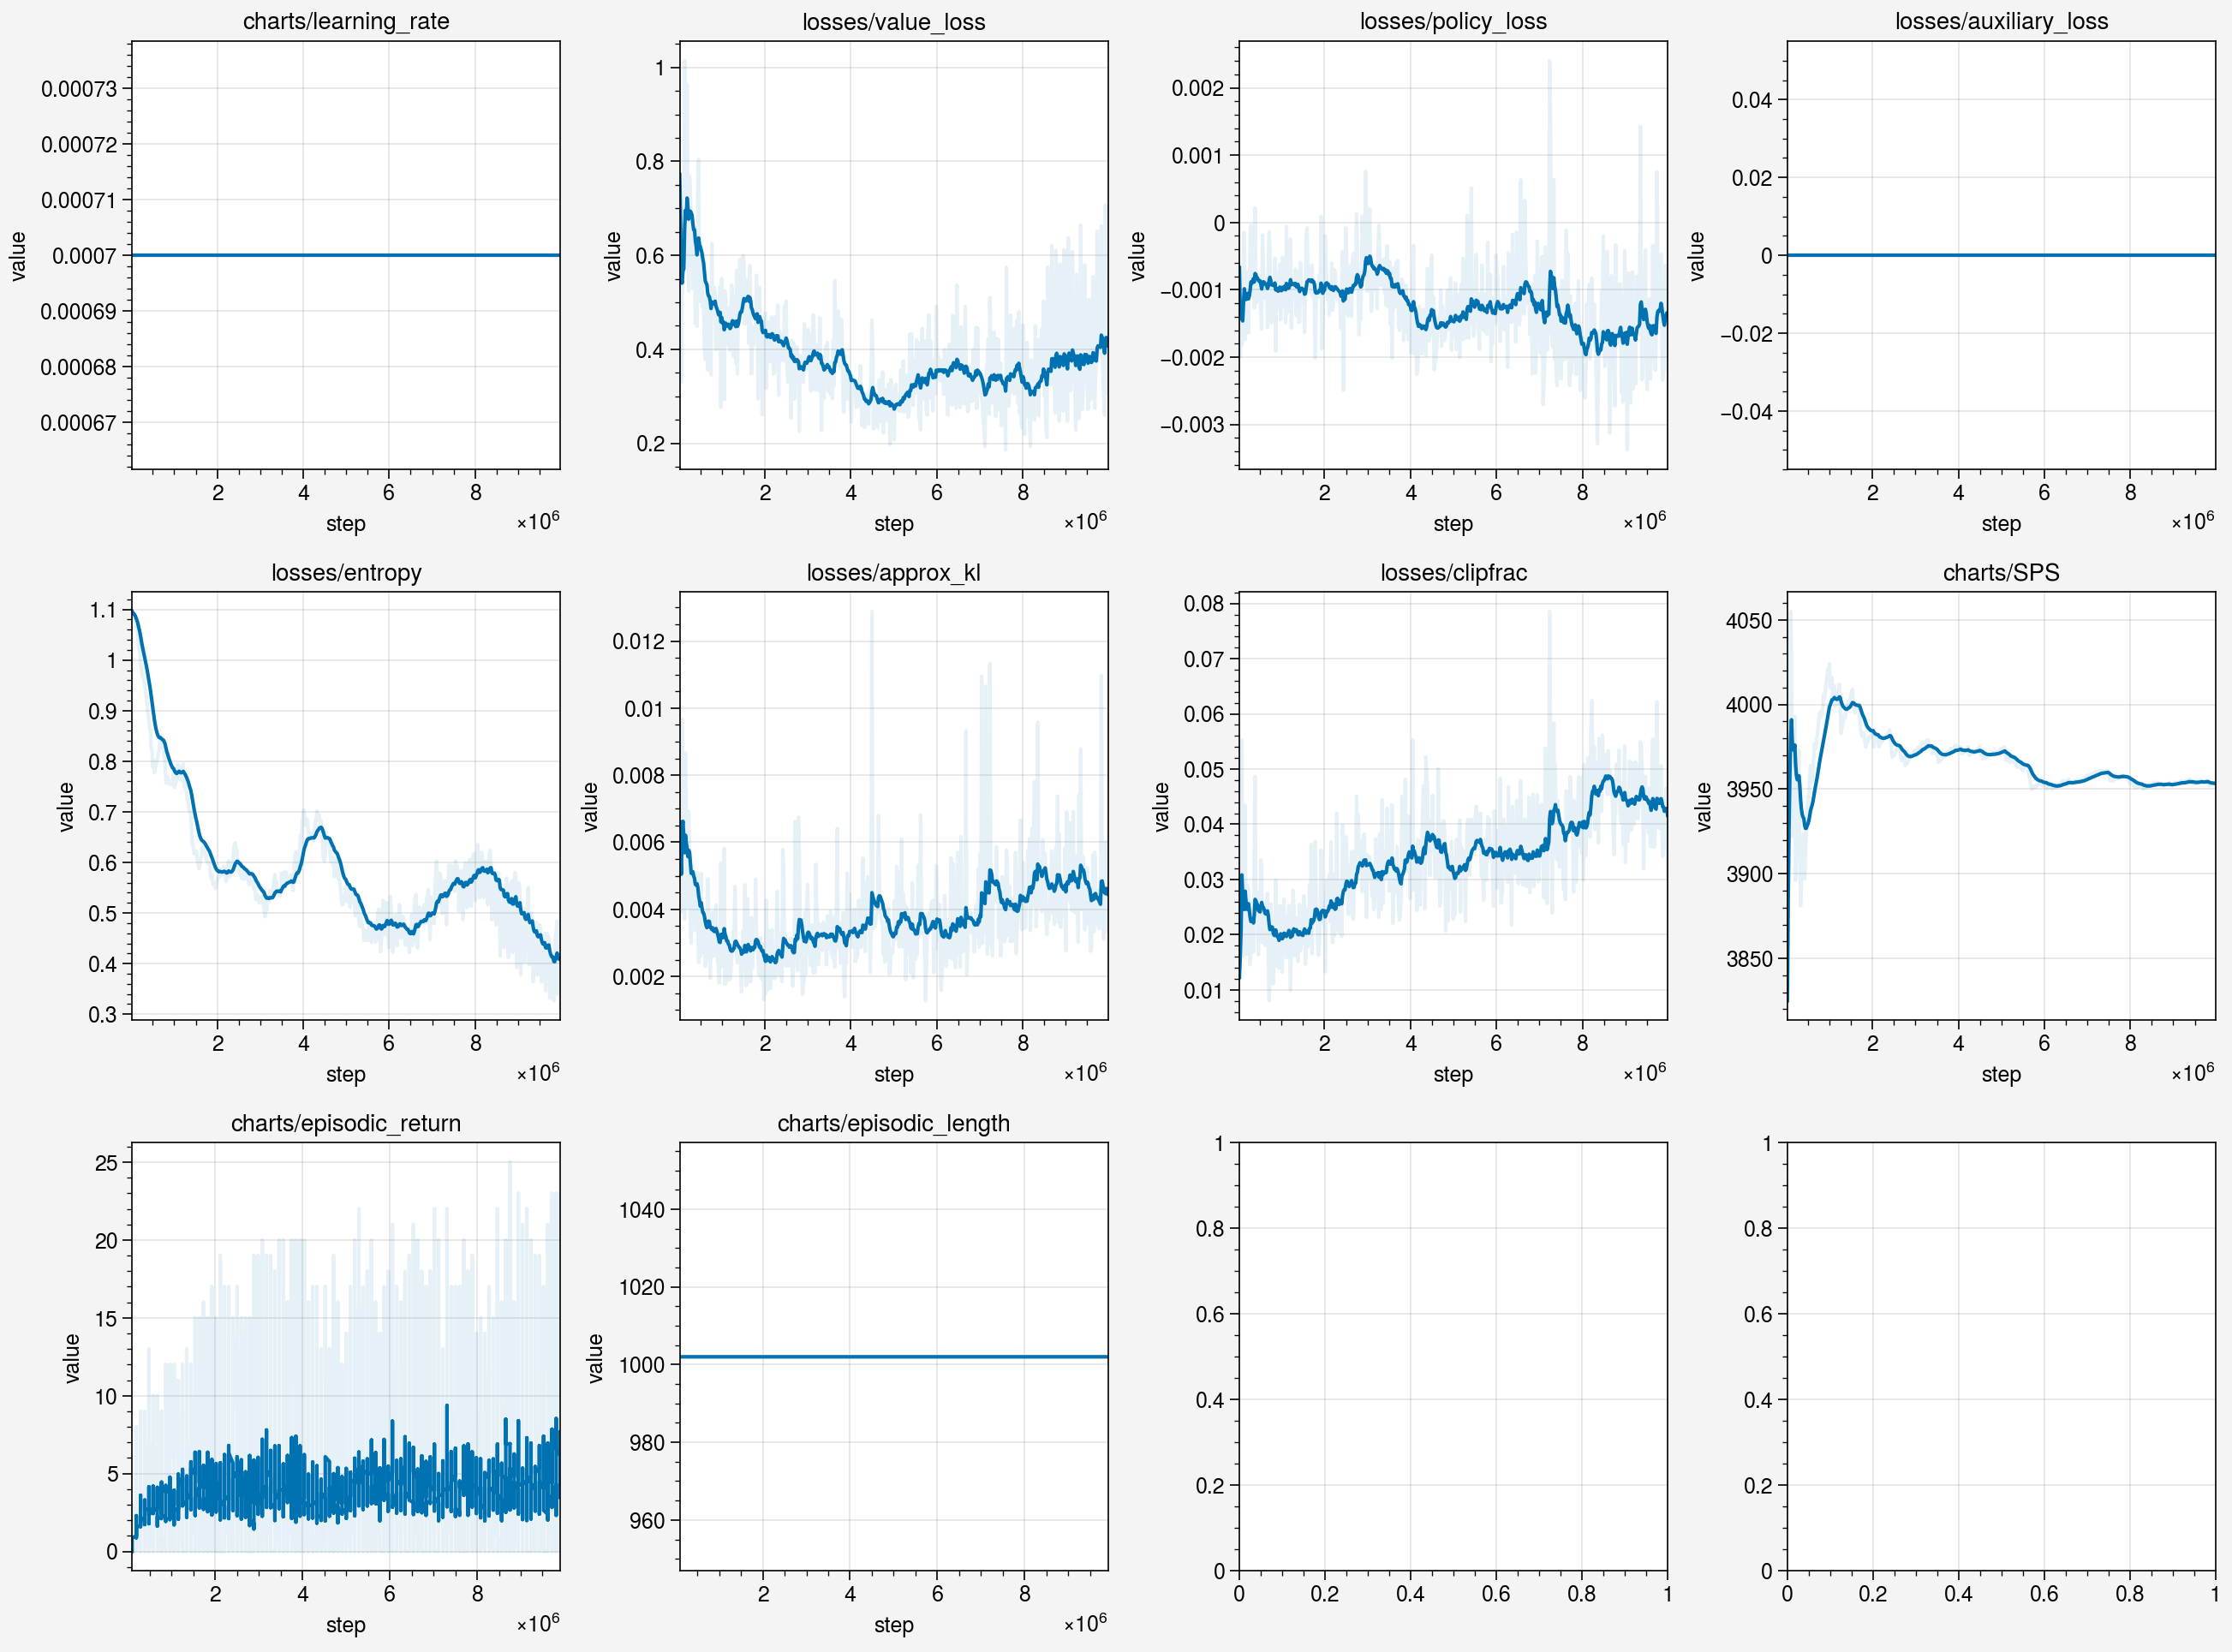

In [4]:
df = load_exp_df(exp_name='meta_poster/meta_c4_batch200')
plot_exp_df(df)

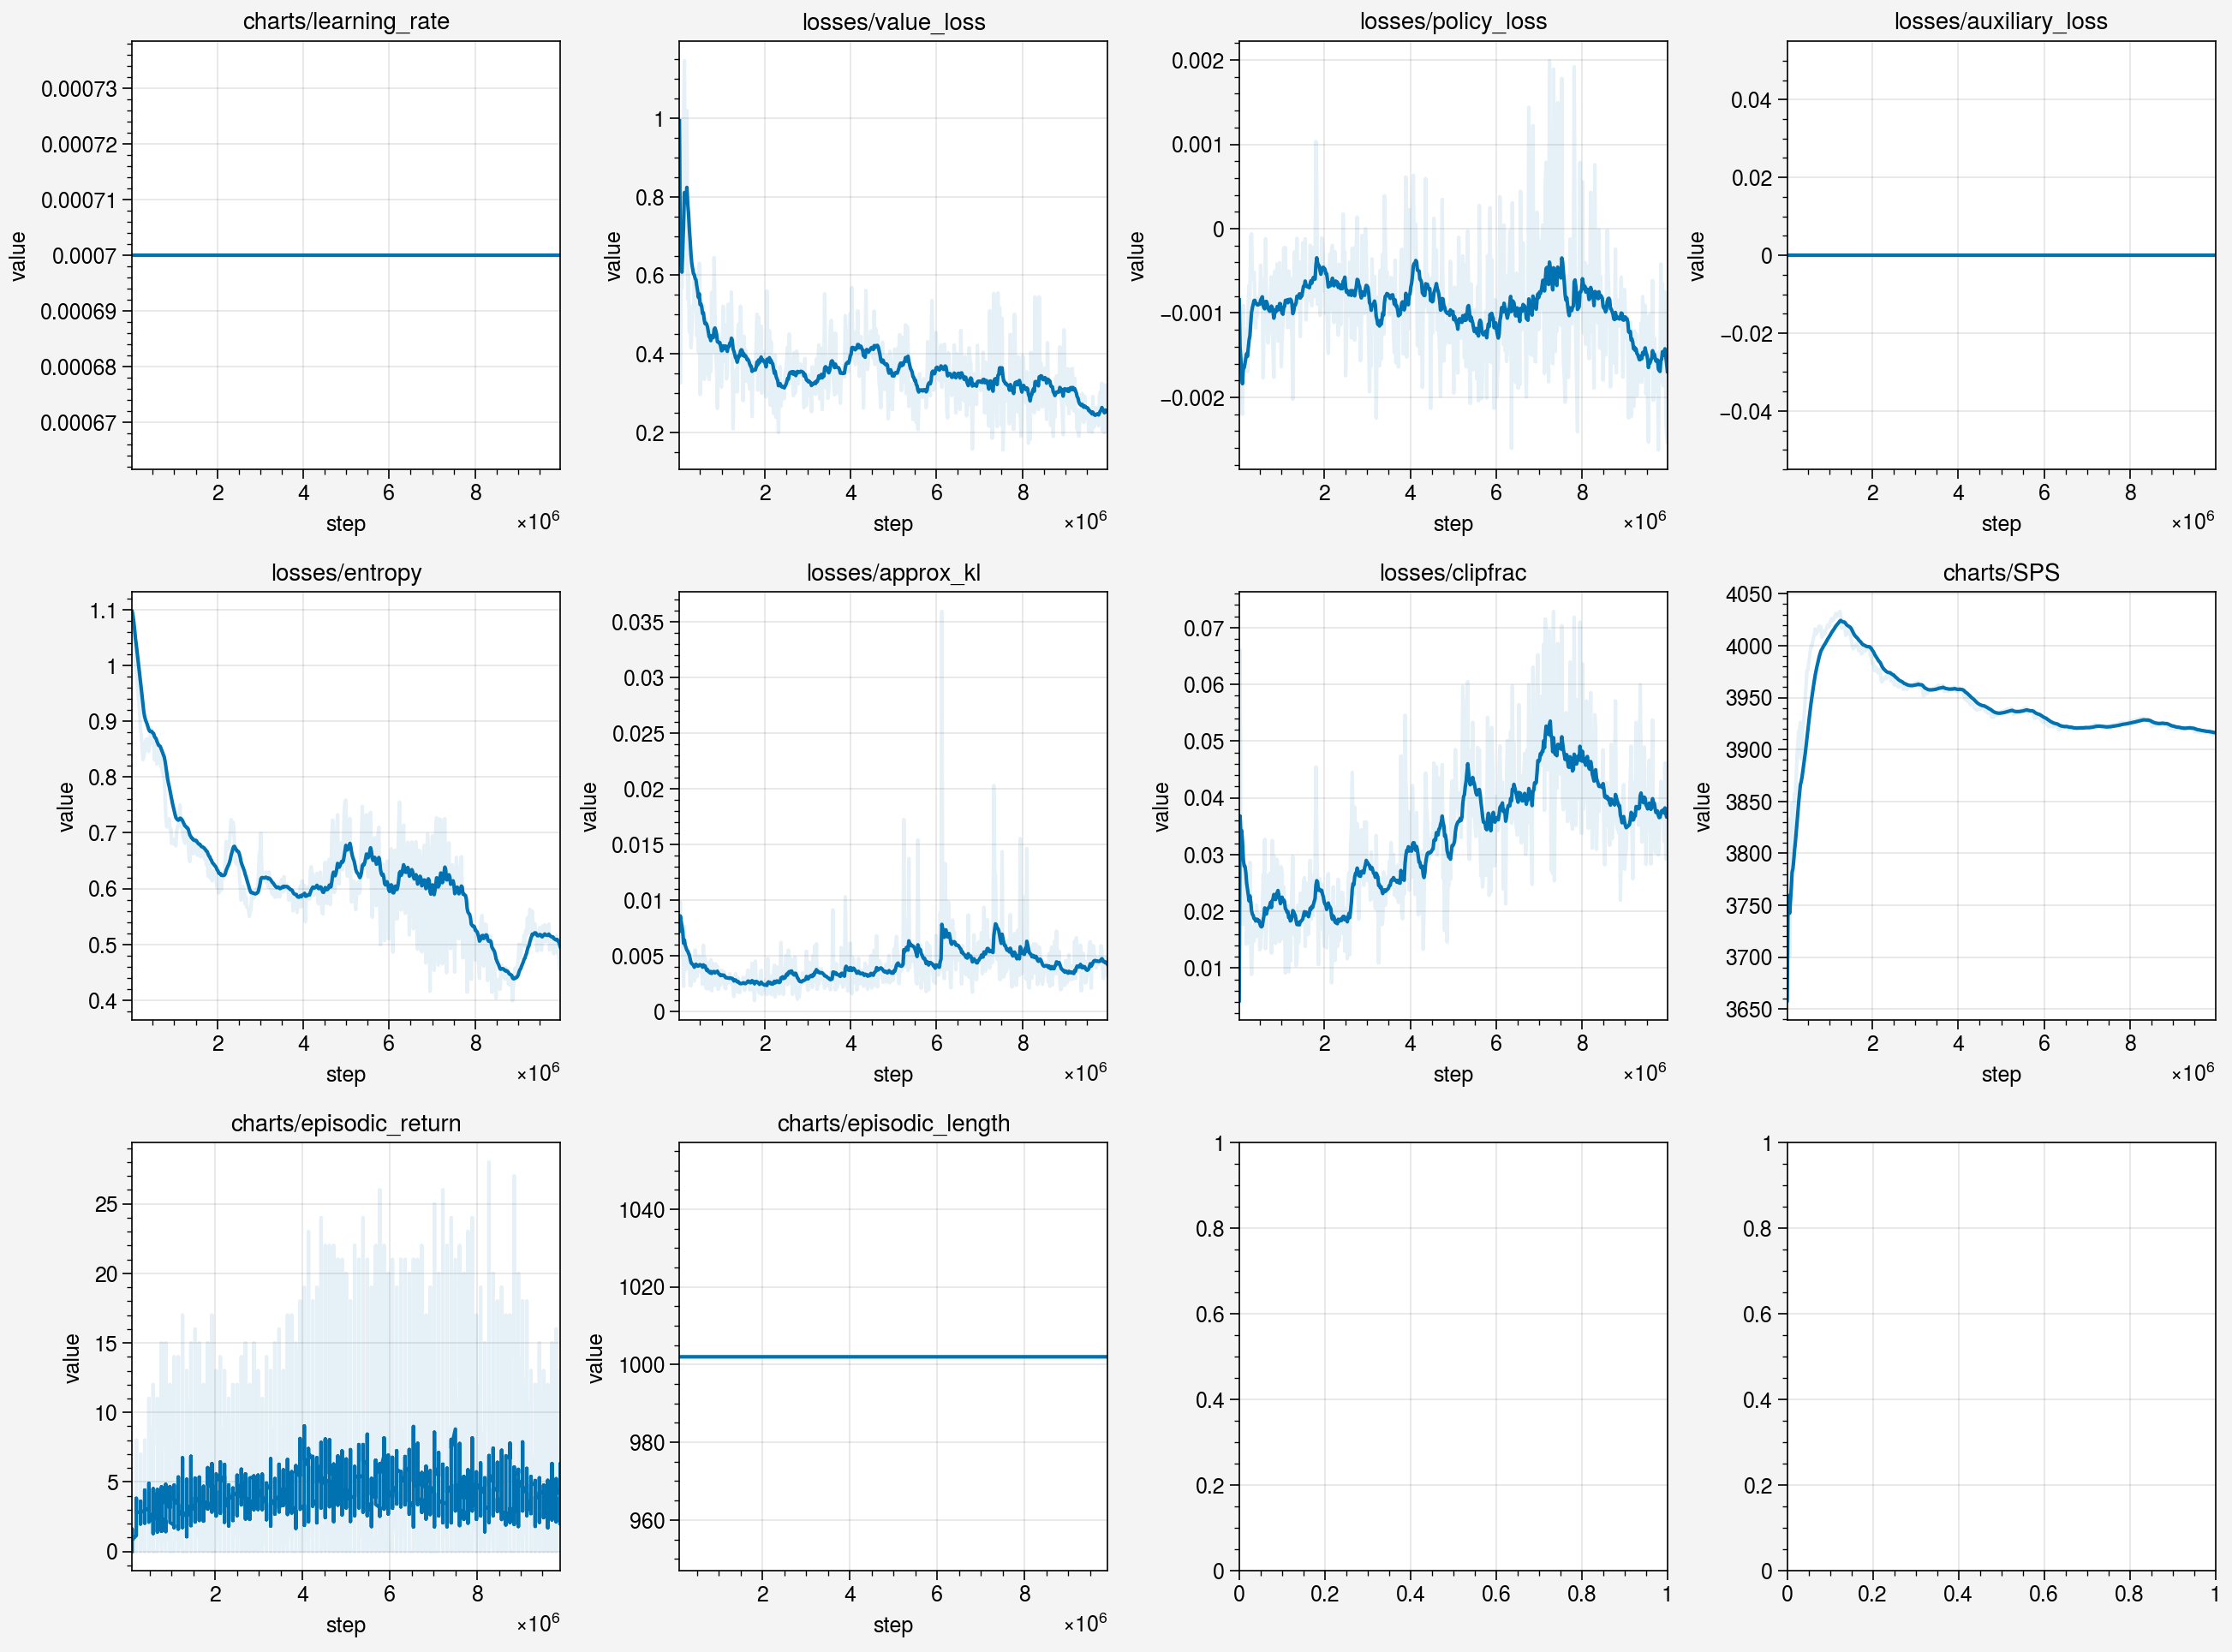

In [5]:
df = load_exp_df(exp_name='meta_poster/meta_c4_batch200', trial_num=1)
plot_exp_df(df)

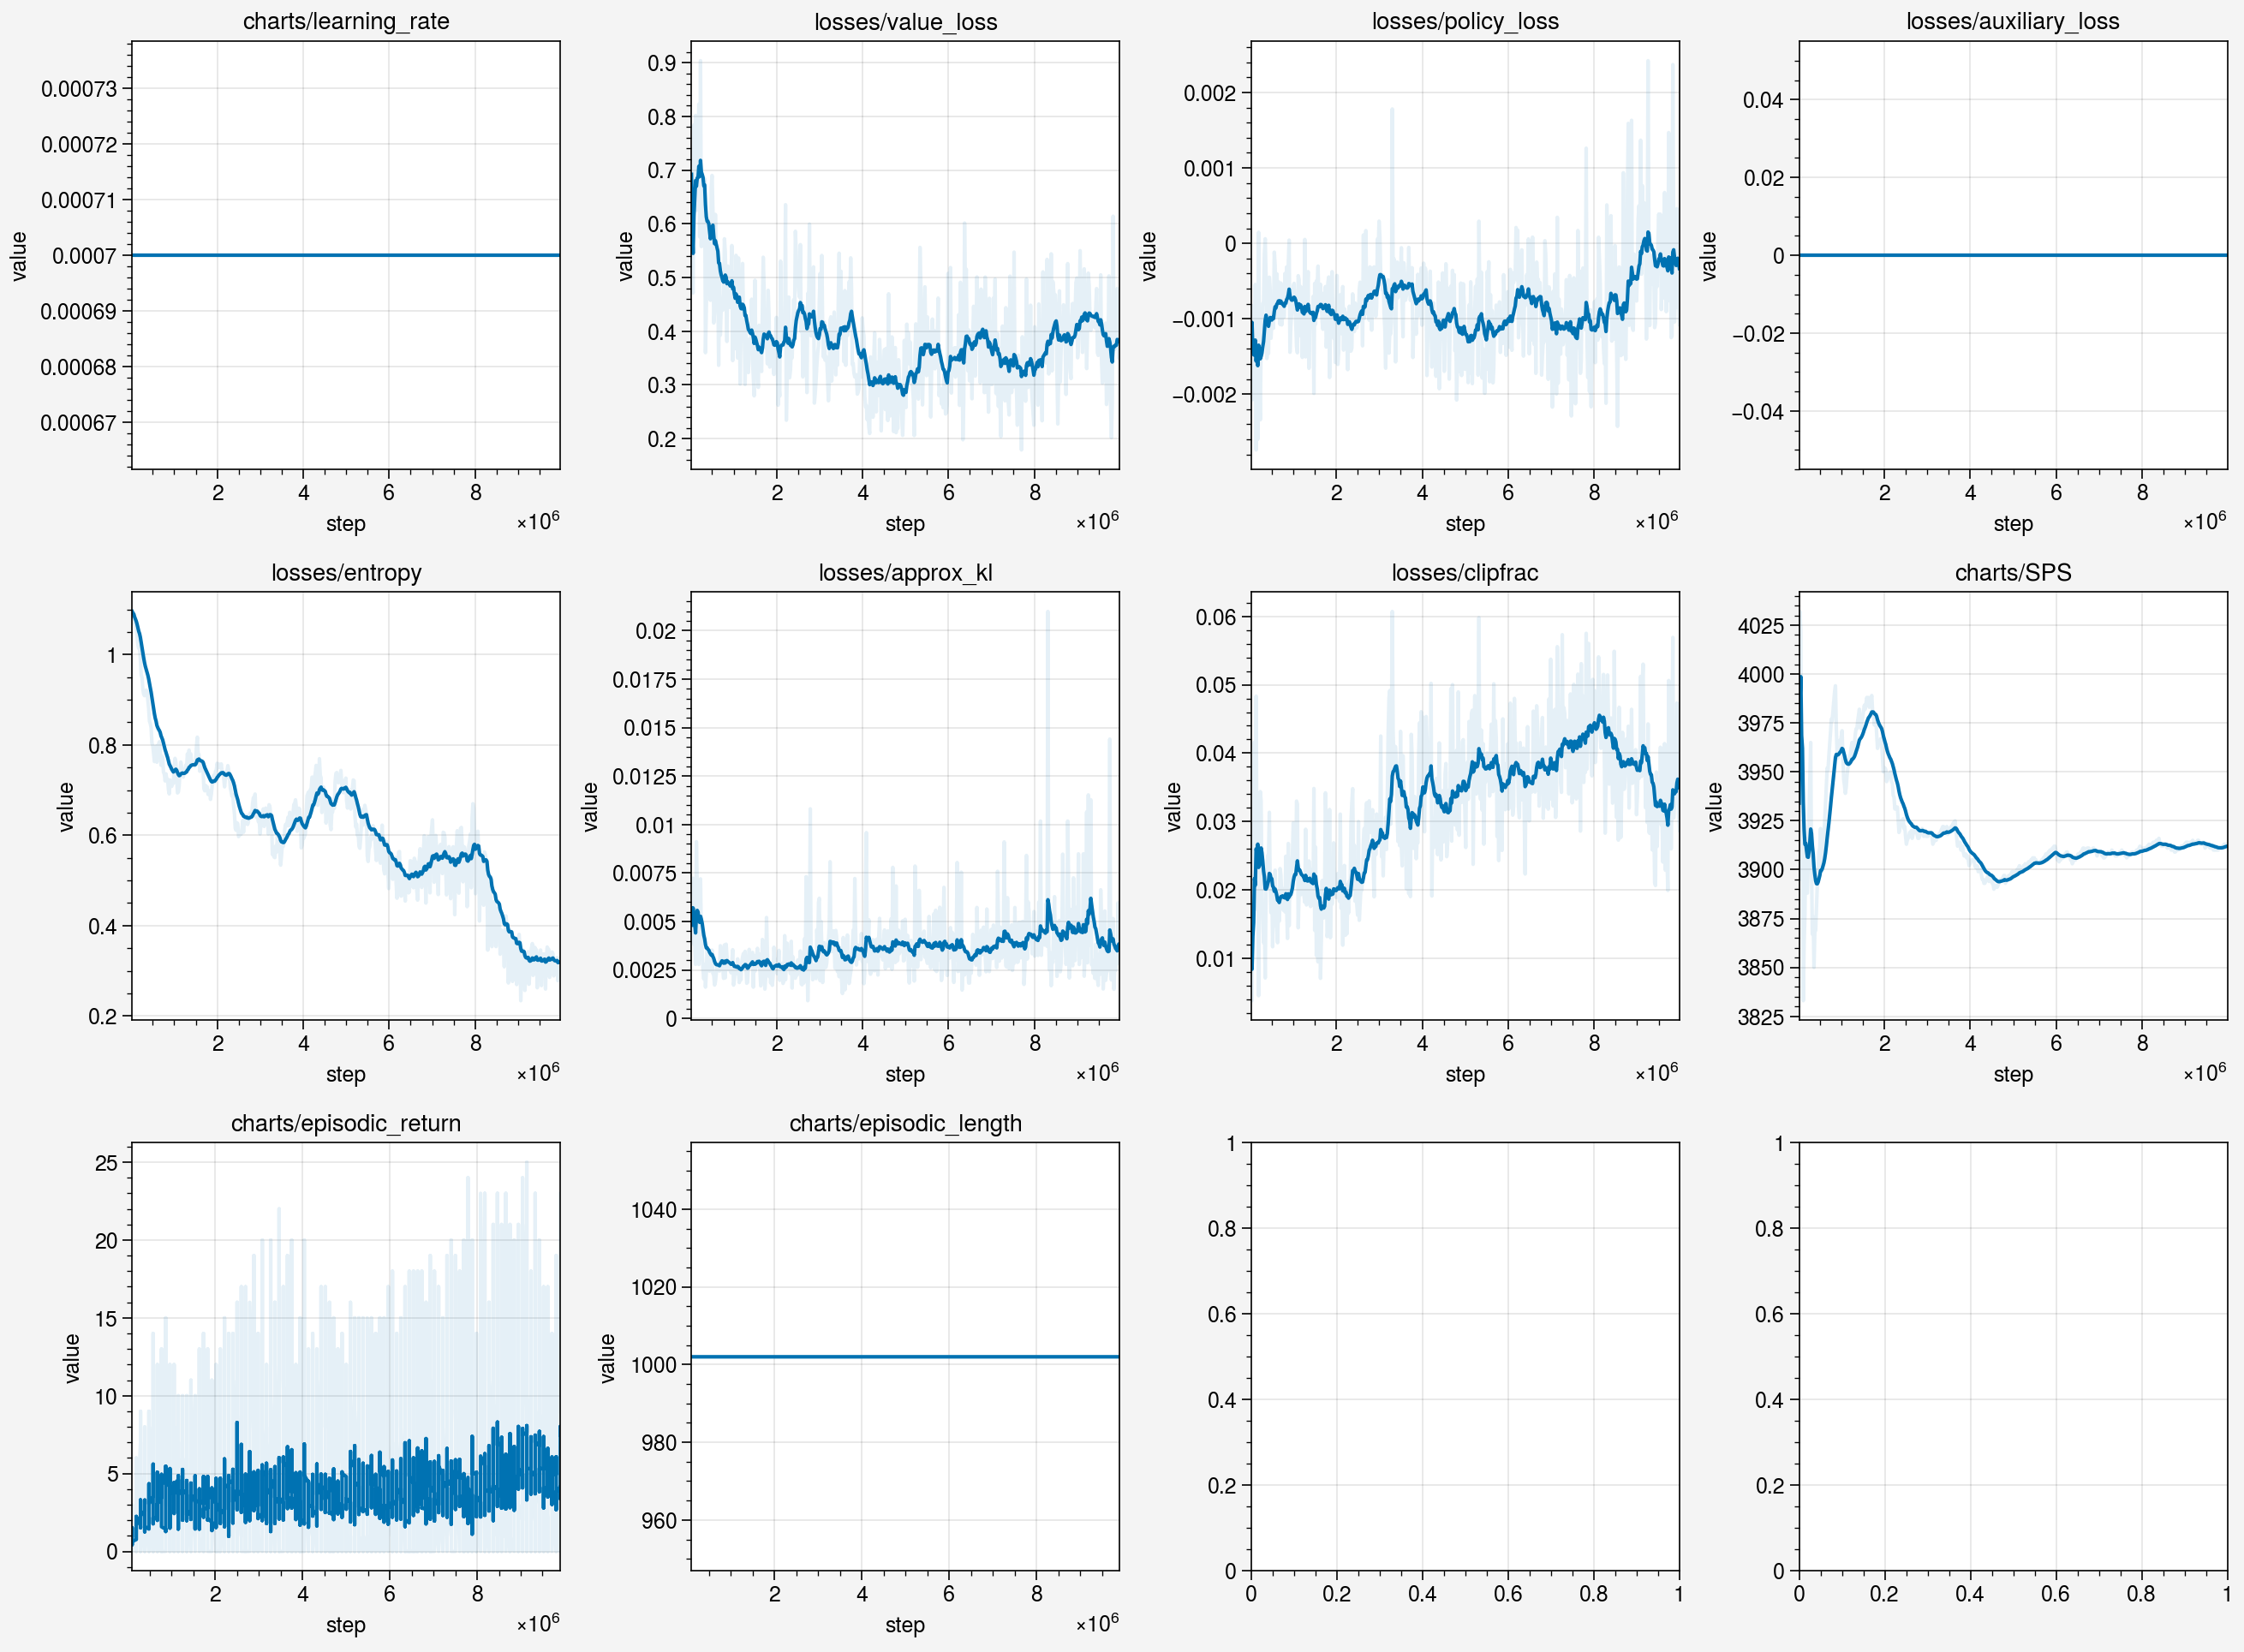

In [6]:
df = load_exp_df(exp_name='meta_poster/meta_c4_batch200', trial_num=2)
plot_exp_df(df)

In [2]:
model_name = 'meta_poster/meta_c4_batch200'
model, obs_rms, kwargs = load_model_and_env(model_name, 0)

env = gym.make('NavEnv-v0', **kwargs)

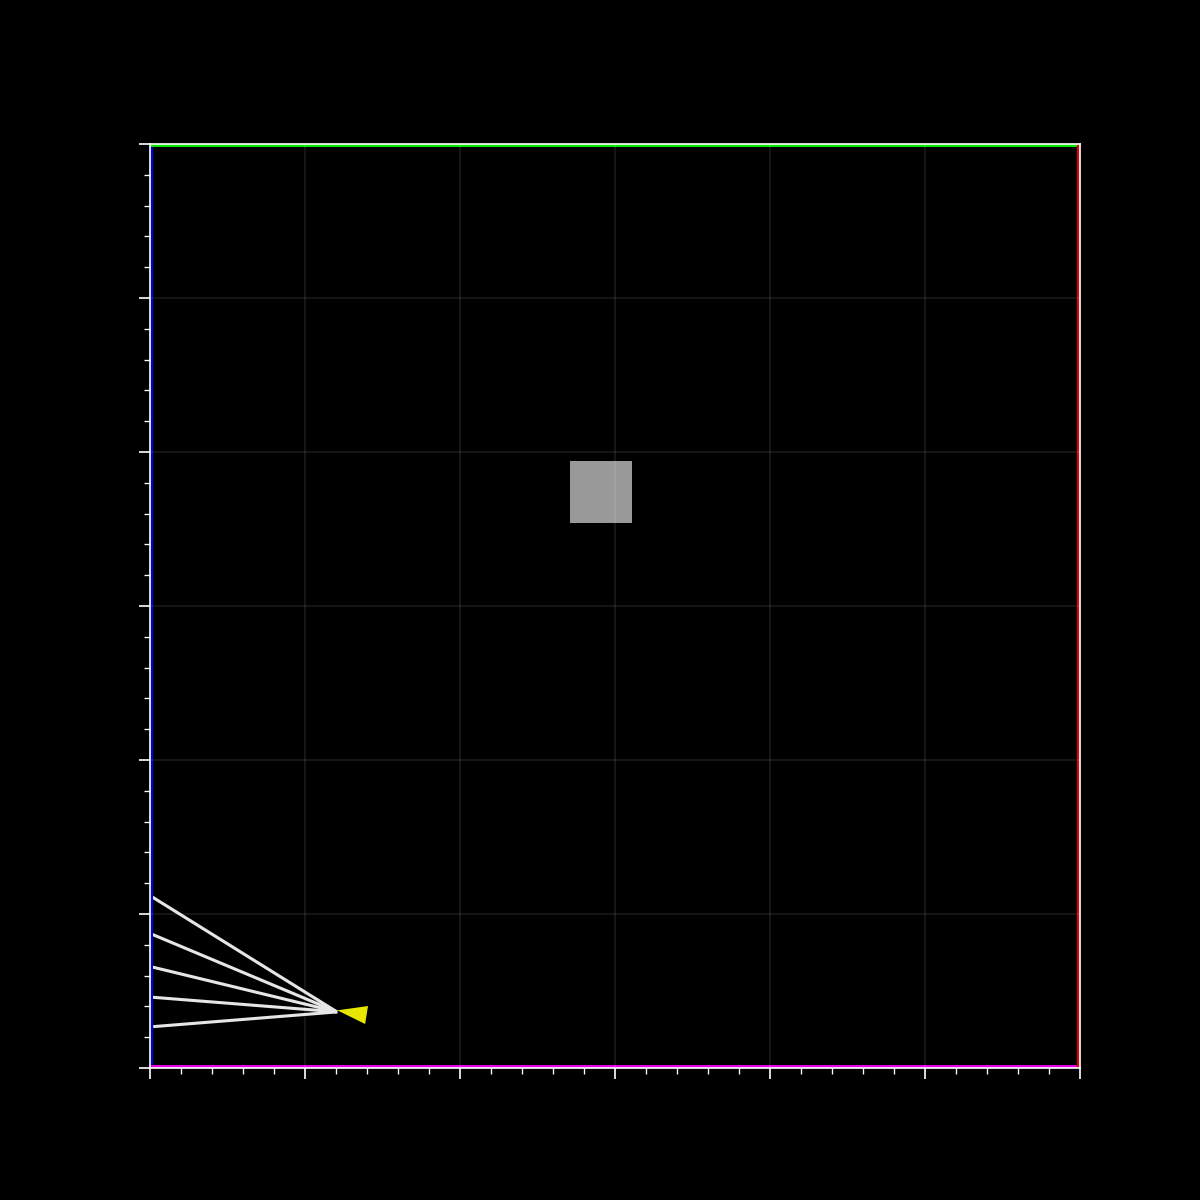

In [3]:
env.reset()
env.render('human')

In [ ]:
env.step(

In [7]:
env.get_observation().dtype

dtype('float64')

In [9]:
env.character.ray_obs().dtype

dtype('float64')

In [11]:
np.append(env.character.ray_obs(), [0])

array([0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.16666667,
       0.26696805, 0.25337938, 0.24711391, 0.24731618, 0.23474946,
       0.        ])